## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [20]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [21]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

## 학습, 예측 데이터셋 나누기

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

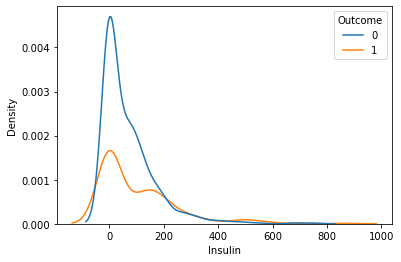

In [24]:
# label 값을 기준으로 나눕니다.
# 나누기 전에 label 값을 시각화 합니다.
sns.kdeplot(data=df, x="Insulin", hue="Outcome")

In [25]:
# train 세트를 만듭니다.
train = df[df["Insulin"] > 0]
train.shape

(394, 9)

In [38]:
df["Insulin"] == 0

0       True
1       True
2       True
3      False
4      False
       ...  
763    False
764     True
765    False
766     True
767     True
Name: Insulin, Length: 768, dtype: bool

In [27]:
# test 세트를 만듭니다.
test = df[df["Insulin"] == 0]
test.shape

(374, 9)

## 정답값이자 예측해야 될 값

In [28]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = "Insulin"
label_name

'Insulin'


## 학습, 예측에 사용할 컬럼

In [39]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
# 컬럼명을 리스트로 가져오고 사용하지 않을 컬럼을 제거합니다.
feature_names = df.columns.tolist()
feature_names.remove(label_name)
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## 학습, 예측 데이터셋 만들기

In [40]:
# 학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names]
X_train.shape

(394, 8)

In [41]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name] # label_name = 'Insulin'
y_train.shape

(394,)

In [32]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test = test[feature_names]
X_test.shape

(374, 8)

In [48]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
y_test.shape

(374,)

## 머신러닝 알고리즘 가져오기

In [43]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model

DecisionTreeRegressor(random_state=42)


## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [49]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## cross validation 으로 학습 세트의 오차 측정하기

In [50]:
model

DecisionTreeRegressor(random_state=42)

In [51]:
X_train.shape, y_train.shape

((394, 8), (394,))

In [56]:
# model_selection의 cross_val_predict 로 cv 로 조각을 나눠 valid 데이터의 학습결과 측정하기
# y_predict

from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_valid_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.4s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished


array([ 25., 480.,  55., 145., 495.])

In [57]:
# 정답을 정확하게 맞춘 갯수
(y_train == y_valid_predict).sum()

3

In [58]:
(y_train == y_valid_predict).mean()

0.007614213197969543

In [59]:
# 전체 예측해야 하는 train 데이터의 갯수
y_train.shape

(394,)

In [82]:
y_valid_predict

array([ 25., 480.,  55., 145., 495., 130., 220., 285., 176., 155., 237.,
       120.,  56., 415., 185.,  25.,  99., 215., 265., 210.,  90., 265.,
        59., 495., 125., 277., 220.,  94., 180.,  44., 115.,  86., 135.,
       291., 115.,  75., 100., 480.,  78.,  57., 180., 155.,  15.,  54.,
       220., 115., 330., 122.,  66.,  84., 168., 231.,  32., 194.,  58.,
       579.,  75.,  54., 106., 120., 106.,  96., 321.,  49., 318.,  70.,
        87., 152., 158., 291.,  99., 145., 231., 167., 100., 165.,  25.,
       210., 190., 150., 110.,  87., 293.,  66.,  49., 342., 100.,  89.,
        49., 846., 110., 192., 204., 130., 235., 182., 191., 166.,  49.,
       105., 207., 115., 250.,  74., 140., 215., 152., 167., 215.,  71.,
        56., 249., 120., 540.,  43.,  37., 207., 210., 130., 465., 310.,
       146.,  40., 190., 392., 237., 200., 190., 142.,  60., 110.,  89.,
       182., 144., 495., 600., 235., 150.,  86., 200., 125., 176., 210.,
       250., 293.,  79., 152.,  46., 291.,  48.,  7

### 실제값과 예측값의 차이 시각화 하기

<AxesSubplot:xlabel='Insulin'>

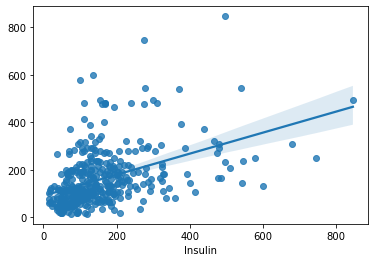

In [60]:
# regplot 으로 결과 값을 비교합니다.
sns.regplot(x=y_train, y=y_valid_predict)

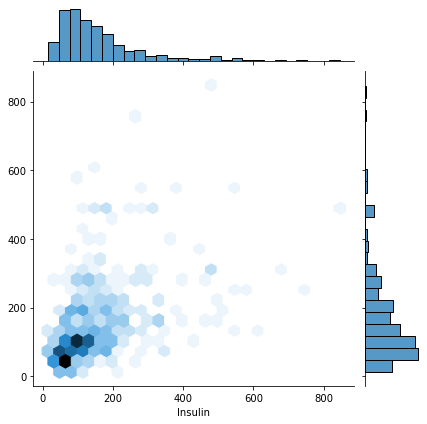

In [61]:
# jointplot 으로 실제값과 예측값을 비교합니다.
sns.jointplot(x=y_train, y=y_valid_predict, kind="hex")

<AxesSubplot:xlabel='Insulin'>

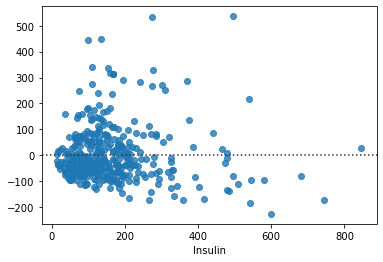

In [62]:
# residplot 으로 잔차(오차값)을 시각화 합니다.
sns.residplot(x=y_train, y=y_valid_predict)

In [63]:
# r2_score 를 구합니다.
from sklearn.metrics import r2_score

r2_score(y_train, y_valid_predict)

-0.14429295602725567

In [64]:
# y_train, y_predict 값을 데이터프레임으로 만듭니다.
df_y = pd.DataFrame({"y_train": y_train, "y_valid_predict": y_valid_predict})
df_y

,y_train,y_valid_predict
3,94,25.0
4,168,480.0
6,88,55.0
8,543,145.0
13,846,495.0
...,...,...
753,510,207.0
755,110,94.0
760,16,60.0
763,180,110.0


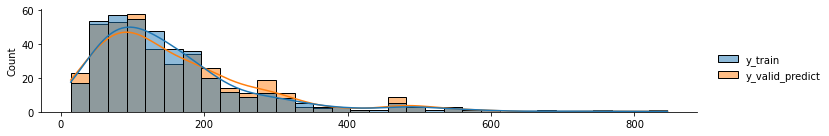

In [65]:
# distplot으로 정답값과 예측값의 분포를 그립니다.
sns.displot(df_y, kde=True, height=2, aspect=5)

## 오차 구하기

In [66]:
y_train[:5]

3      94
4     168
6      88
8     543
13    846
Name: Insulin, dtype: int64

In [67]:
y_valid_predict[:5]

array([ 25., 480.,  55., 145., 495.])

In [68]:
# 오차값 구하기
error = y_train - y_valid_predict
error

3       69.0
4     -312.0
6       33.0
8      398.0
13     351.0
       ...  
753    303.0
755     16.0
760    -44.0
763     70.0
765      2.0
Name: Insulin, Length: 394, dtype: float64

In [69]:
# 오차값에 대한 describe 값을 구합니다.
error.describe()

count    394.000000
mean      -3.941624
std      126.995158
min     -479.000000
25%      -58.750000
50%        2.500000
75%       49.500000
max      495.000000
Name: Insulin, dtype: float64

In [70]:
# abs == absolute 절대값
abs(error).describe()

count    394.000000
mean      86.571066
std       92.896321
min        0.000000
25%       22.250000
50%       55.000000
75%      115.000000
max      495.000000
Name: Insulin, dtype: float64

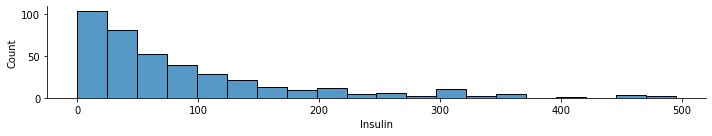

In [71]:
# displot으로 오차값의 분포를 그립니다.
sns.displot(abs(error), height=2, aspect=5)

### MAE(Mean Absolute Error)
* [Mean absolute error - Wikipedia](https://en.wikipedia.org/wiki/Mean_absolute_error)

In [72]:
# 예측값과 실제값의 차이에 대한 절대값의 평균
# mae

error = y_train - y_valid_predict
mae = abs(error).mean()
mae

86.57106598984771

### MAPE(Mean Absolute Percentage Error)

In [73]:
# (실제값 - 예측값 / 실제값)의 절대값에 대한 평균
error = y_train - y_valid_predict
mape = abs(error / y_train).mean()
mape

0.687125648313691

### MSE(Mean Squared Error)

In [74]:
# 실제값 - 예측값의 차이의 제곱의 평균
# MAE와 비슷해 보이나 제곱을 통해 음수를 양수로 변환함
# 분산과 유사한 공식
# mse
error = y_train - y_valid_predict
mse = np.square(error).mean()
mse

16102.373096446701

### RMSE(Root Mean Squared Error)

In [75]:
# RMSE
rmse = np.sqrt(mse)
rmse

126.89512636995443

## 트리 알고리즘 분석하기
* 피처의 중요도를 구합니다.

In [76]:
# 피처의 중요도를 추출하기
model.feature_importances_

array([4.20201517e-02, 4.08219914e-01, 6.24932543e-02, 5.97519119e-02,
       1.10296456e-01, 1.63917473e-01, 1.52984660e-01, 3.16179009e-04])

<AxesSubplot:>

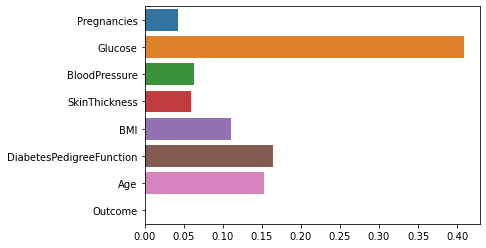

In [77]:
# 피처의 중요도 시각화 하기
sns.barplot(x=model.feature_importances_, y=feature_names)

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.
* Insulin 이 0인 값을 예측 했기 때문에 정답을 알 수 없습니다.
* 따라서 점수는 train set로 측정한 값을 참고합니다.

In [78]:



# y_test 
y_predict = model.predict(X_test)
y_predict[:5]

array([168.,  37., 145.,  36., 182.])

### 실제값과 예측값 비교하기

In [79]:
# train 데이터셋의 Outcome 값에 따라 Insulin 수치 describe 로 비교해 보기
train.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [80]:
# test 의 Insulin 값을 y_test 에 반영합니다.
test["Insulin"] = y_predict

C:\Users\computer\AppData\Local\Temp/ipykernel_30928/882383279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Insulin"] = y_predict


In [81]:
# test 데이터셋의 Outcome 값에 따라 Insulin 수치 describe 로 비교해 보기
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,133.161017,102.224032,15.0,64.0,99.5,158.25,600.0
1,138.0,212.434783,141.952236,44.0,115.0,176.0,267.00,846.0
